# (Optional) Advanced Fashion MNIST Image Classification

In this notebook, we will explore advanced image processing techniques and build a Convolutional Neural Network (CNN) for fashion image classification using the Fashion MNIST dataset. We will cover data augmentation, model architecture, and evaluation metrics.

## Loading the Fashion MNIST Dataset

We start by loading the Fashion MNIST dataset, which consists of 70,000 grayscale images of fashion products from 10 categories. The dataset is split into 60,000 training images and 10,000 test images, each of size 28x28 pixels.

In [ ]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## Data Preprocessing

Before training the CNN model, we need to preprocess the image data. This involves reshaping the images, normalizing the pixel values, and applying one-hot encoding to the labels.

In [ ]:
# Reshape the images to include a single channel
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

## Data Augmentation

Data augmentation is a technique used to artificially increase the size of the training dataset by applying random transformations to the images. This helps to improve the model's generalization and reduces overfitting.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

In this example, we use the ImageDataGenerator from Keras to apply random rotations, width and height shifts, and horizontal flips to the training images.

## Building the CNN Model

Now, let's build a CNN model for fashion image classification. CNNs are well-suited for image data as they can learn spatial hierarchies of features.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

This CNN architecture consists of three convolutional layers followed by max pooling layers for downsampling. The output is then flattened and passed through fully connected layers with dropout regularization. The final layer uses the softmax activation function for multi-class classification.

## Training the Model

We train the CNN model using the augmented training data and validate it on the test set.

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.0553 - accuracy: 0.6104 - val_loss: 0.7480 - val_accuracy: 0.7257
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.7467 - accuracy: 0.7221 - val_loss: 0.6547 - val_accuracy: 0.7479
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6751 - accuracy: 0.7458 - val_loss: 0.5596 - val_accuracy: 0.7780
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6285 - accuracy: 0.7689 - val_loss: 0.5058 - val_accuracy: 0.8101
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5928 - accuracy: 0.7844 - val_loss: 0.4680 - val_accuracy: 0.8336
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5581 - accuracy: 0.7963 - val_loss: 0.4539 - val_accuracy: 0.8355
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5403 - accuracy: 0.8035 - val_loss: 0.4334 - val_a

## Model Evaluation

After training, we evaluate the model's performance on the test set using various metrics.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.4599 - accuracy: 0.8363
Test Loss: 0.4599
Test Accuracy: 0.8363


## Visualization

We can visualize the training and validation accuracy/loss curves to assess the model's performance over the epochs.

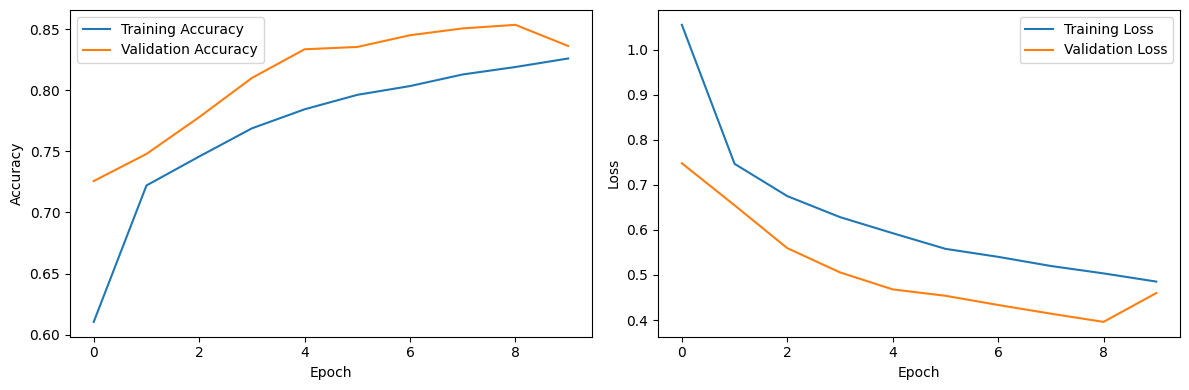

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.83      0.80      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.85      0.68      0.76      1000
       Dress       0.84      0.90      0.87      1000
        Coat       0.65      0.89      0.75      1000
      Sandal       0.85      0.99      0.91      1000
       Shirt       0.62      0.41      0.49      1000
     Sneaker       0.97      0.76      0.85      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.90      0.97      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000



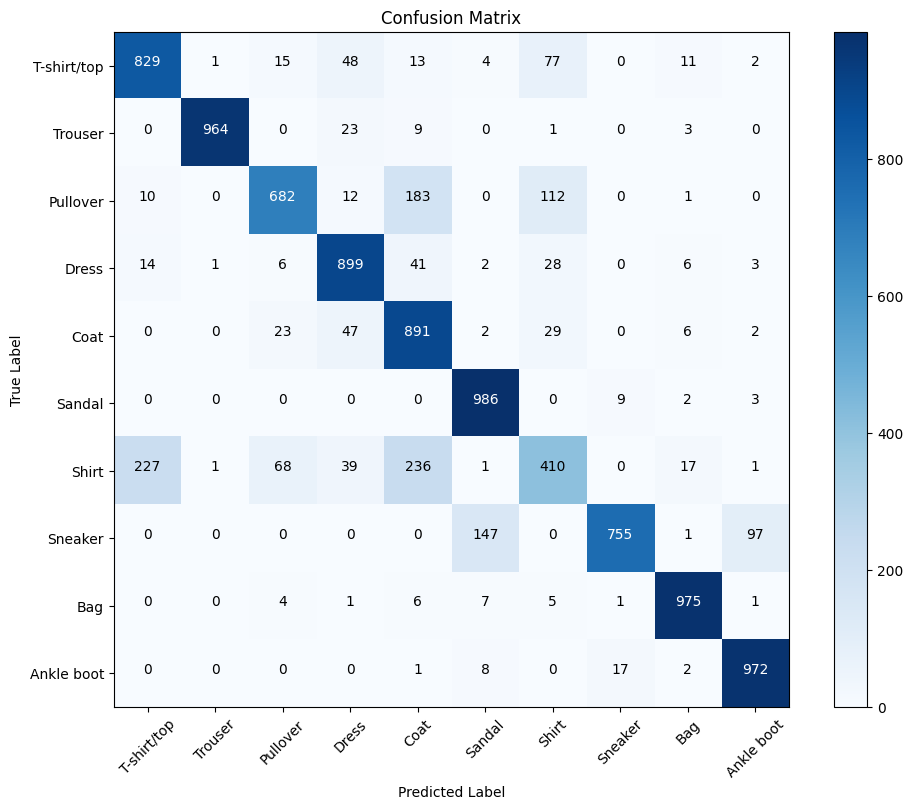

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import itertools

class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Print the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_labels))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Real-time Predictions

Lastly, we can use the trained model to make predictions on new, unseen images.

In [ ]:
# from tensorflow.keras.preprocessing import image

# def preprocess_image(image_path):
#     img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
#     img_array = image.img_to_array(img)
#     img_array = img_array.reshape(1, 28, 28, 1) / 255.0
#     return img_array

# # Example usage
# image_path = 'path/to/image.jpg'
# img_array = preprocess_image(image_path)
# prediction = model.predict(img_array)
# predicted_class = np.argmax(prediction)

# class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# print(f"Predicted class: {class_labels[predicted_class]}")